In [1]:
# Importing Libraries
import cv2
import mediapipe as mp
import copy
import numpy as np
import os
from utils.cvfpscalc import CvFpsCalc
import matplotlib.pyplot as plt
# Used to convert protobuf message
# to a dictionary.
from google.protobuf.json_format import MessageToDict

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [3]:
def get_bbox_coordinates(handLadmark, image_shape):
    
    all_x, all_y = [], [] # store all x and y points in list
    for hnd in mp_hands.HandLandmark:
        all_x.append(int(handLadmark.landmark[hnd].x * image_shape[1])) # multiply x by image width
        all_y.append(int(handLadmark.landmark[hnd].y * image_shape[0])) # multiply y by image height

    return min(all_x), min(all_y), max(all_x), max(all_y) # return as (xmin, ymin, xmax, ymax)

In [7]:
d = input('Alphabet: ')

dir0 = 'path_to_directory'+d
print(dir0)
try:
    os.mkdir(dir0)
except:
    print('Already exists, using same directory')
brect = []
i=0
cap = cv2.VideoCapture('path_to_directory' + d + '.mp4')
#cap = cv2.VideoCapture(0)
_, frame = cap.read()
h, w, c = frame.shape
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        #fps = cvFpsCalc.get()
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        image = cv2.flip(image, 1)  # Mirror display
        debug_image = copy.deepcopy(image)
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image)
        prev_brect = brect
        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # If hands are present in image(frame)
        if results.multi_hand_landmarks:
            brect = []
            for hand_landmarks in results.multi_hand_landmarks:
                brect.append(get_bbox_coordinates(hand_landmarks, (h, w)))
                    
            if len(brect)==1:
                cv2.rectangle(image, (brect[0][0]-35, brect[0][1]-35), (brect[0][2]+35, brect[0][3]+35), 2)
                roi = image[brect[0][1]-35:brect[0][3]+35, brect[0][0]-35:brect[0][2]+35]
                cv2.imwrite(dir0+'/' + 'anki' + str(i)+'.jpg', roi)
                i += 1
                print(dir0+'/' + 'anki' + str(i)+'.jpg')

            if len(brect)>1:
                cv2.rectangle(image, (min(brect[0][0], brect[1][0])-35, (min(brect[0][1], brect[1][1]))-35), (max(brect[0][2], brect[1][2])+35, (max(brect[0][3], brect[1][3]))+35), 2)
                roi = image[min(brect[0][1], brect[1][1])-35:max(brect[0][3], brect[1][3])+35, min(brect[0][0], brect[1][0])-35:max(brect[0][2], brect[1][2])+35]
                cv2.imwrite(dir0+'/' + 'anki' + str(i)+'.jpg', roi)
                i += 1
                print(dir0+'/' + 'anki' + str(i)+'.jpg')

            if cv2.waitKey(5) & 0xFF == 27:
                break
            if i>174:
                break
cap.release()

D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z
D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z/anki1.jpg
D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z/anki2.jpg
D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z/anki3.jpg
D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z/anki4.jpg
D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z/anki5.jpg
D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z/anki6.jpg
D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z/anki7.jpg
D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/Z/anki8.jpg
D:/College/Textbooks/Sixth_semester/Ca

(128, 128, 3)

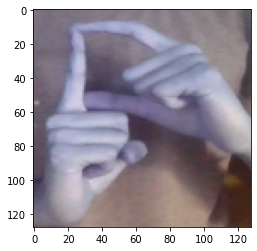

In [18]:
img = cv2.imread("D:/College/Textbooks/Sixth_semester/Capstone_Project/Implementation/Dataset_related/New_dataset/D/997.jpg")
img = cv2.resize(img, (128,128))
plt.imshow(img)
img.shape